# Example of a Factory Performance Test

This example ilustrates the whole process, from compute, convert, check and report a performance test

In [1]:
from pump import *

## 1st Step : computing the test data with water

In [4]:
# Instantiating the class Fluid
water = Fluid(
    name="Water",
    density=Q_(1000000, "g/m**3")
)

In [5]:
# Instantiating the performance points test
# Refernce = 05.03.2021 planilha Excel

capacity = [0.00001, 198, 300, 400, 510, 618, 680]
rpm = [3591, 3588, 3586, 3583, 3581, 3570, 3580]
input_power = [957.85, 1260.73, 1459.67, 1615.14, 1750.10, 1840.01, 1856.37]
inlet_pressure = [1.58, 1.50, 1.40, 1.27, 1.12, 0.92, 0.82]
outlet_pressure = [130, 126, 123, 115, 106, 92, 78]

# Create TestPoint objects in a list
test_points = [
    TestPoint(
        fluid=water,
        capacity=Q_(i, "m**3/h"),
        speed_of_rotation=Q_(j, "rpm"),
        breaking_power=Q_(k, "kW"),
        inlet_pressure=Q_(l, "kgf/cm**2"),
        outlet_pressure=Q_(m, "kgf/cm**2"),
        inlet_diameter=Q_(8, "in"),
        outlet_diameter=Q_(6, "in"),
    )
    for i, j, k, l, m in zip(capacity, rpm, input_power, inlet_pressure, outlet_pressure)
]

print("\nTest results")
for idx, point in enumerate(test_points, start=1):
    print(f"Point #{idx}")
    print("\tAttributes:\n\t" + 20 * "=")
    for attr_name, attr_value in point.__dict__.items():
        print(f"\t{attr_name}: {attr_value}")
    print("\n\tComputed Methods:\n\t" + 20 * "=")
    print(f"\tinlet_velocity: {point.inlet_velocity:.2f~P}")
    print(f"\toutlet_velocity: {point.outlet_velocity:.2f~P}")
    print(f"\thead: {point.head:.2f~P}")
    print(f"\tvelocity_head: {point.velocity_head:.2f~P}")
    print(f"\televation_head: {point.elevation_head:.2f~P}")
    print(f"\thydraulic_power: {point.hydraulic_power:.2f~P}")
    try:
        print(f"\tefficiency: {point.efficiency:.2f~P}")
    except AttributeError:
        print(f"\tefficiency: Not defined (missing 'breaking_power'?)")
    print()



Test results
Point #1
	Attributes:
	fluid: Fluid(name=Water, density=1000.0 kilogram / meter ** 3)
	capacity: 1e-05 meter ** 3 / hour
	speed_of_rotation: 3591 revolutions_per_minute
	breaking_power: 957.85 kilowatt
	inlet_pressure: 1.5494507000000002 bar
	outlet_pressure: 127.48645000000002 bar
	inlet_diameter: 0.2032 meter
	outlet_diameter: 0.15239999999999998 meter

	Computed Methods:
	inlet_velocity: 0.00 m/s
	outlet_velocity: 0.00 m/s
	head: 1283.76 m
	velocity_head: 0.00 m
	elevation_head: 0.00 m
	hydraulic_power: 0.00 kW
	efficiency: 0.00 %

Point #2
	Attributes:
	fluid: Fluid(name=Water, density=1000.0 kilogram / meter ** 3)
	capacity: 198 meter ** 3 / hour
	speed_of_rotation: 3588 revolutions_per_minute
	breaking_power: 1260.73 kilowatt
	inlet_pressure: 1.4709975000000002 bar
	outlet_pressure: 123.56379000000001 bar
	inlet_diameter: 0.2032 meter
	outlet_diameter: 0.15239999999999998 meter

	Computed Methods:
	inlet_velocity: 1.70 m/s
	outlet_velocity: 3.02 m/s
	head: 1244.89 m

In [6]:
# Inspecting some values
header = (
    "   Capacity    "
    "Efficiency      "
    "Hydr. Power  "
    "Breaking Power"
)
print(header)
for point in test_points:
    values = (
        f"{point.capacity:6.02f~P}\t"
        f"{point.efficiency:7.02f~P}\t"
        f"{point.hydraulic_power:7.02f~P}\t"
        f"{point.breaking_power:7.02f~P}"
    )
    print(values)

   Capacity    Efficiency      Hydr. Power  Breaking Power
  0.00 m³/h	   0.00 %	   0.00 kW	 957.85 kW
198.00 m³/h	  53.28 %	 671.68 kW	1260.73 kW
300.00 m³/h	  68.12 %	 994.33 kW	1459.67 kW
400.00 m³/h	  76.81 %	1240.64 kW	1615.14 kW
510.00 m³/h	  83.42 %	1459.99 kW	1750.10 kW
618.00 m³/h	  83.61 %	1538.51 kW	1840.01 kW
680.00 m³/h	  77.39 %	1436.58 kW	1856.37 kW


In [7]:
# Instantianting a Performance Curve
water_curve = PerformanceCurve(fluid=water, points=test_points)

print(header)
for point in water_curve:
    values = (
        f"{point.capacity:6.02f~P}\t"
        f"{point.efficiency:7.02f~P}\t"
        f"{point.hydraulic_power:7.02f~P}\t"
        f"{point.breaking_power:7.02f~P}"
    )
    print(values)

   Capacity    Efficiency      Hydr. Power  Breaking Power
  0.00 m³/h	   0.00 %	   0.00 kW	 957.85 kW
198.00 m³/h	  53.28 %	 671.68 kW	1260.73 kW
300.00 m³/h	  68.12 %	 994.33 kW	1459.67 kW
400.00 m³/h	  76.81 %	1240.64 kW	1615.14 kW
510.00 m³/h	  83.42 %	1459.99 kW	1750.10 kW
618.00 m³/h	  83.61 %	1538.51 kW	1840.01 kW
680.00 m³/h	  77.39 %	1436.58 kW	1856.37 kW


In [8]:
print(water_curve.test_summary)

+-------------+-----------+------------------+------------------+--------------+
| Flow        | Head      | Breaking Power   | Hydralic Power   | Efficiency   |
+=============+===========+==================+==================+==============+
| 0.00 m³/h   | 1283.76 m | 957.85 kW        | 0.00 kW          | 0.00 %       |
+-------------+-----------+------------------+------------------+--------------+
| 198.00 m³/h | 1244.89 m | 1260.73 kW       | 671.68 kW        | 53.28 %      |
+-------------+-----------+------------------+------------------+--------------+
| 300.00 m³/h | 1216.31 m | 1459.67 kW       | 994.33 kW        | 68.12 %      |
+-------------+-----------+------------------+------------------+--------------+
| 400.00 m³/h | 1138.20 m | 1615.14 kW       | 1240.64 kW       | 76.81 %      |
+-------------+-----------+------------------+------------------+--------------+
| 510.00 m³/h | 1050.54 m | 1750.10 kW       | 1459.99 kW       | 83.42 %      |
+-------------+-----------+-

# 2nd Step: correcting the speed

In [9]:
# Correcting the speed
speed_curve = water_curve.to_speed(
    Q_(3550, "rpm")
)

print(header)
for point in speed_curve:
    values = (
        f"{point.capacity:6.02f~P}\t"
        f"{point.efficiency:7.02f~P}\t"
        f"{point.hydraulic_power:7.02f~P}\t"
        f"{point.breaking_power:7.02f~P}"
    )
    print(values)

   Capacity    Efficiency      Hydr. Power  Breaking Power
  0.00 m³/h	   0.00 %	   0.00 kW	 925.41 kW
195.90 m³/h	  53.28 %	 650.57 kW	1221.10 kW
296.99 m³/h	  68.12 %	 964.69 kW	1416.15 kW
396.32 m³/h	  76.81 %	1206.68 kW	1570.92 kW
505.59 m³/h	  83.42 %	1422.40 kW	1705.04 kW
614.54 m³/h	  83.61 %	1512.79 kW	1809.26 kW
674.30 m³/h	  77.39 %	1400.77 kW	1810.09 kW


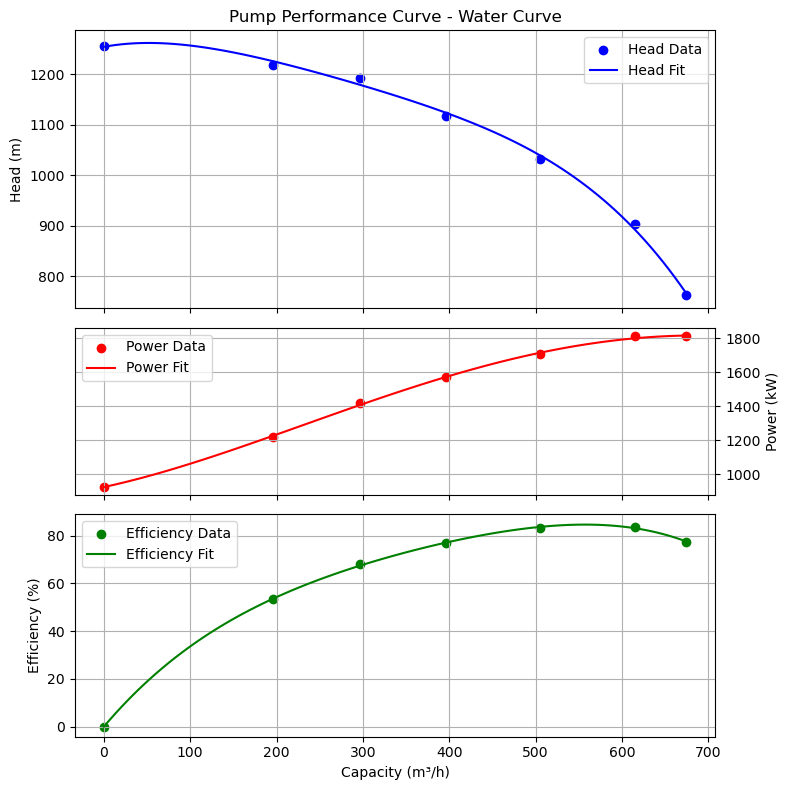

In [10]:
speed_curve.plot_performance_curve()

# 3rd Step: correcting the density

In [11]:
oil = Fluid(
    name="Oil",
    density=Q_(891000, "g/m**3")
)

# Correcting the Density
service_curve = speed_curve.to_fluid(oil)

print(header)
for point in service_curve:
    values = (
        f"{point.capacity:6.02f~P}\t"
        f"{point.efficiency:7.02f~P}\t"
        f"{point.hydraulic_power:7.02f~P}\t"
        f"{point.breaking_power:7.02f~P}"
    )
    print(values)

   Capacity    Efficiency      Hydr. Power  Breaking Power
  0.00 m³/h	   0.00 %	   0.00 kW	 824.54 kW
195.90 m³/h	  53.28 %	 579.65 kW	1088.00 kW
296.99 m³/h	  68.12 %	 859.54 kW	1261.79 kW
396.32 m³/h	  76.81 %	1075.15 kW	1399.69 kW
505.59 m³/h	  83.42 %	1267.36 kW	1519.19 kW
614.54 m³/h	  83.61 %	1347.90 kW	1612.05 kW
674.30 m³/h	  77.39 %	1248.08 kW	1612.79 kW


# 4th Step: plotting the results

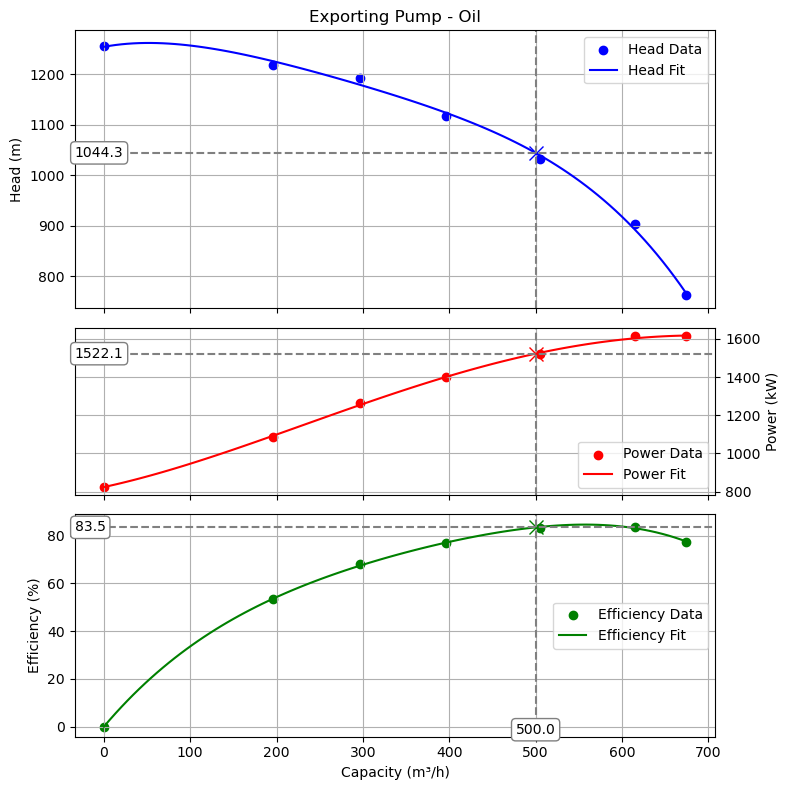

In [12]:
# Here we can add the rated capacity to highliht it
service_curve.plot_performance_curve(
    chart_title="Exporting Pump",
    capacity=Q_(500, "m**3/h")
)

# Checking the acceptance

In [13]:
# Instantiate the reference
design_point = DesignPoint(fluid=oil,
                           capacity=Q_(500, "m**3/h"),
                           head_shutoff=Q_(1060 * 1.20,"m"),
                           head=Q_(1060,"m"),
                           speed_of_rotation=Q_(3550, "rpm"),
                           breaking_power=Q_(1692.7, "kW"))

In [14]:
checker = PerformanceChecker(design_point, service_curve)
print(checker.test_summary)

+-------------+-----------+------------------+------------------+--------------+
| Flow        | Head      | Breaking Power   | Hydralic Power   | Efficiency   |
+=============+===========+==================+==================+==============+
| 0.00 m³/h   | 1254.61 m | 824.54 kW        | 0.00 kW          | 0.00 %       |
+-------------+-----------+------------------+------------------+--------------+
| 195.90 m³/h | 1218.66 m | 1088.00 kW       | 579.65 kW        | 53.28 %      |
+-------------+-----------+------------------+------------------+--------------+
| 296.99 m³/h | 1192.01 m | 1261.79 kW       | 859.54 kW        | 68.12 %      |
+-------------+-----------+------------------+------------------+--------------+
| 396.32 m³/h | 1117.33 m | 1399.69 kW       | 1075.15 kW       | 76.81 %      |
+-------------+-----------+------------------+------------------+--------------+
| 505.59 m³/h | 1032.43 m | 1519.19 kW       | 1267.36 kW       | 83.42 %      |
+-------------+-----------+-

In [15]:
print(checker.check_summary)

+-------------+-----------+-----------+----------------+--------------+------------------+---------------+
| Flow        | Head      | Head OK   | Shutoff Head   | Shutoff OK   | Breaking Power   | B. Power OK   |
+=============+===========+===========+================+==============+==================+===============+
| 0.00 m³/h   | 1254.61 m | False     | 1254.61 m      | True         | 824.54 kW        | True          |
+-------------+-----------+-----------+----------------+--------------+------------------+---------------+
| 195.90 m³/h | 1218.66 m | False     | N/A            | N/A          | 1088.00 kW       | True          |
+-------------+-----------+-----------+----------------+--------------+------------------+---------------+
| 296.99 m³/h | 1192.01 m | False     | N/A            | N/A          | 1261.79 kW       | True          |
+-------------+-----------+-----------+----------------+--------------+------------------+---------------+
| 396.32 m³/h | 1117.33 m | False    

In [16]:
print(checker.test_summary_with_limits)

+-------------+-----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| Flow        | Head      | Head Min   | Head Max   | Shutoff Head   | Shutoff Min   | Shutoff Max   | Breaking Power   | Max B. Power   |
+=============+===========+============+============+================+===============+===============+==================+================+
| 0.00 m³/h   | 1254.61 m | 1028.20 m  | 1091.80 m  | 1254.61 m      | 1208.40 m     | 1335.60 m     | 824.54 kW        | 1760.41 kW     |
+-------------+-----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| 195.90 m³/h | 1218.66 m | 1028.20 m  | 1091.80 m  | N/A            | 1208.40 m     | 1335.60 m     | 1088.00 kW       | 1760.41 kW     |
+-------------+-----------+------------+------------+----------------+---------------+---------------+------------------+----------------+
| 296.99 m³/h | 1192.01 m |

In [17]:
checker.report_summary

{'Head': [<Quantity(1044.26529, 'meter')>,
  <Quantity(1028.2, 'meter')>,
  <Quantity(1091.8, 'meter')>],
 'Breaking Power': [<Quantity(1522.11077, 'kilowatt')>,
  '-',
  <Quantity(1760.41, 'kilowatt')>],
 'Efficiency': <Quantity(83.496343, 'percent')>,
 'Rated Capacity': <Quantity(500, 'meter ** 3 / hour')>}

# 5th Step: generating the report

## Organizing the input data

In [18]:
# Step 1: Adding some general and specific data
equipament_description = {
    "TAG": "B-4300.22101A/B",
    "Serial Number": "12345-67890",
    "Manufacturer": "ACME Pumps Ltd.",
    "Model": "XP-2000"
}
test_data = {
    "B-4300.22101A" : {
        "Performance Curve - Water" : water_curve.plot_performance_curve(capacity=design_point.capacity,return_io=True),
        "Performance Curve - Service Fluid" : service_curve.plot_performance_curve(capacity=design_point.capacity, return_io=True),
        "test_summary" : checker.report_summary,
        "test_data" : service_curve.test_data,
    }
}
# Step 2: Prepare Report Input Data
report_data = {
    "design_point" : design_point,
    "equipment_description": equipament_description,
    "test_data" : test_data
}

In [19]:
report_generator = ReportGenerator(language="pt")
output_filename = report_generator.generate_report(report_data)
print(f"📄 Report generated: {output_filename}")

Novo documento salvo em: Relatório_B-4300.22101AB_10-03-2025.docx
📄 Report generated: Relatório_B-4300.22101AB_10-03-2025.docx


In [20]:
report_generator = ReportGenerator(language="en")
output_filename = report_generator.generate_report(report_data)
print(f"📄 Report generated: {output_filename}")

New document saved at: Report_B-4300.22101AB_10-03-2025.docx
📄 Report generated: Report_B-4300.22101AB_10-03-2025.docx


# TODO:
1. Inserir correção de viscosidade se aplicácel
2. Create a container class

In [21]:
class PumpSystem:
    """
    A container class to manage multiple design points and performance curves.
    Allows easy addition, removal, and retrieval of pump configurations.
    """
    def __init__(self):
        self.design_points = []  # List of DesignPoint objects
        self.performance_curves = []  # List of PumpPerformanceCurve objects

    def add_design_point(self, design_point):
        self.design_points.append(design_point)

    def add_performance_curve(self, curve):
        self.performance_curves.append(curve)

    def remove_design_point(self, design_point):
        self.design_points.remove(design_point)

    def remove_performance_curve(self, curve):
        self.performance_curves.remove(curve)

    def get_design_points(self):
        return self.design_points

    def get_performance_curves(self):
        return self.performance_curves

    def compare_curves(self):
        """ Compares all stored performance curves by plotting them together. """
        plt.figure(figsize=(8, 6))
        for curve in self.performance_curves:
            capacities = curve._get_capacities()
            heads = [p.head.to("m").magnitude for p in curve.points]
            plt.plot(capacities, heads, label=f"Curve {self.performance_curves.index(curve)+1}")
        
        plt.xlabel("Capacity (m³/h)")
        plt.ylabel("Head (m)")
        plt.title("Comparison of Pump Performance Curves")
        plt.legend()
        plt.grid()
        plt.show()

# Example usage
container = PumpSystem()
container.add_design_point(design_point)

curve1 = PerformanceCurve(water, test_points)
curve2 = PerformanceCurve(water, test_points)
container.add_performance_curve(curve1)
container.add_performance_curve(curve2)

container.compare_curves()


NameError: name 'plt' is not defined